# Breast Cancer Classification

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [12]:
dataset = sklearn.datasets.load_breast_cancer()

In [13]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [14]:
#loading data to data frame

data = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [15]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
#adding target colum to dataset
data['label'] = dataset.target

In [17]:
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [18]:
data.shape

(569, 31)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [20]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [21]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [22]:
data['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [23]:
data.groupby(data['label']).mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


1 --> Benign

0 --> Malignant

In [24]:
#separate the features and target
X = data.drop(columns=['label'],axis=1)
y = data['label']

In [25]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)

In [28]:
X.shape,X_train.shape,X_test.shape

((569, 30), (455, 30), (114, 30))

In [29]:
#Standadize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

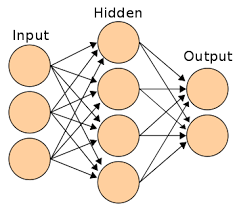

##### Building Neural Network

In [30]:
#Importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [39]:
#layers of neural networks

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
]
)
#Build our ANN Model

# model = Sequential([
#     Dense(64,activation='relu',input_shape=(X_train_std.shape[1],)),  #HL1 connected with IP layer
#     Dense(32,activation='relu'),  #HL2
#     Dense(2,activation='sigmoid')  #O/p layer

# ]
# )

d:\PROJECT\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 662 (2.59 KB)

 Trainable params: 662 (2.59 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
#compling neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
# #training neural network

history = model.fit(X_train_std,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.3212 - loss: 1.0016 - val_accuracy: 0.5870 - val_loss: 0.7393
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7002 - loss: 0.6540 - val_accuracy: 0.7174 - val_loss: 0.5398
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8517 - loss: 0.4634 - val_accuracy: 0.7826 - val_loss: 0.4315
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8979 - loss: 0.3565 - val_accuracy: 0.8478 - val_loss: 0.3628
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9067 - loss: 0.2885 - val_accuracy: 0.8913 - val_loss: 0.3155
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9214 - loss: 0.2412 - val_accuracy: 0.8913 - val_loss: 0.2804
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9368 - loss: 0.2069 - val_accuracy: 0.9565 - val_loss: 0.2533
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9506 - loss: 0.1816 - val_accuracy: 0.9565 - val_loss

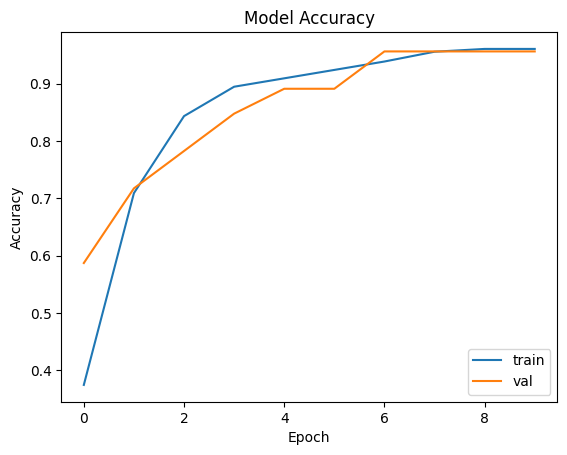

In [43]:
#Visualize 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='lower right')
plt.show()

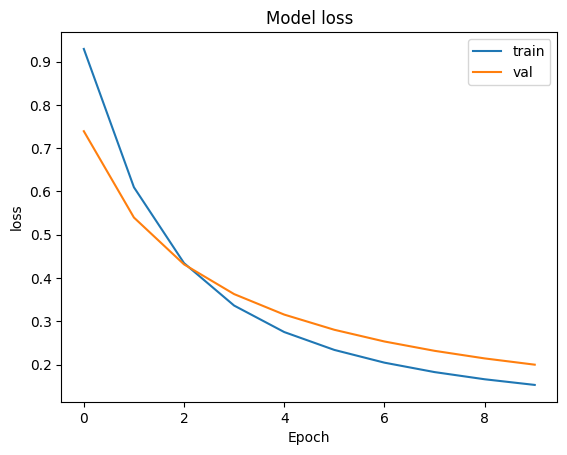

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='upper right')
plt.show()

In [45]:
#Accuracy of model test data 
loss,accuracy = model.evaluate(X_test_std,y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9232 - loss: 0.1899 
0.9122806787490845


In [46]:
#predictive system
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[ 1.56851278  2.16401585  1.74286587  1.62076364 -0.26537607  1.91593165
  1.09245512  1.69889576  0.30958918 -0.06988421  1.6582331  -0.03455846
  2.19927944  1.6097947  -0.2323368   1.19871549  0.18795672  0.55981664
 -0.16207336  0.52383207  1.86216011  1.70820774  2.17062246  1.91370109
 -0.18774006  1.74427462  0.68856004  1.20214432 -0.14043064  0.90036171]


In [47]:
y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [48]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.92724645 0.04420114]


In [49]:
print(X_test_std)

[[ 1.56851278  2.16401585  1.74286587 ...  1.20214432 -0.14043064
   0.90036171]
 [-0.84027641 -0.5970672  -0.8741735  ... -1.10124064 -0.81429139
  -0.71323608]
 [-0.07072262  1.19138742  0.03202768 ...  0.57255843  1.14997397
   1.86841162]
 ...
 [ 0.3583966  -0.44935493  0.48264098 ...  1.63386036  0.54117564
   1.91191948]
 [-0.41401799  1.07321761 -0.42314565 ...  0.06139464 -0.1280378
   0.64747227]
 [-0.6829327  -0.69932953 -0.66607058 ... -0.23615965 -0.16211811
  -0.20147486]]


In [50]:
print(y_pred)

[[9.27246451e-01 4.42011394e-02]
 [2.11267415e-02 8.82591069e-01]
 [7.12167382e-01 2.66224712e-01]
 [4.15675730e-01 3.72070760e-01]
 [8.68401349e-01 5.08246943e-02]
 [8.58412087e-02 6.03488743e-01]
 [6.35221899e-02 9.49656546e-01]
 [9.20957863e-01 1.99352279e-01]
 [7.46721745e-01 2.17279688e-01]
 [9.65062082e-01 2.68627293e-02]
 [3.15386862e-01 6.20520234e-01]
 [6.65178716e-01 2.49574766e-01]
 [4.70831506e-02 6.26250386e-01]
 [7.70214498e-01 1.79250568e-01]
 [6.00284338e-01 2.85965472e-01]
 [3.32513809e-01 6.02339983e-01]
 [5.73582411e-01 3.50429565e-01]
 [5.10283113e-01 6.57920361e-01]
 [1.09594157e-02 7.01666117e-01]
 [5.51594436e-01 7.45767593e-01]
 [6.62603080e-01 2.43455932e-01]
 [5.12763619e-01 4.02554035e-01]
 [5.40641919e-02 8.77288818e-01]
 [4.29266512e-01 9.37186956e-01]
 [1.12321645e-01 8.47633004e-01]
 [2.13884458e-01 4.89571065e-01]
 [9.19188619e-01 6.58141151e-02]
 [2.40876809e-01 7.04907060e-01]
 [3.11719924e-01 8.29018295e-01]
 [4.85810786e-02 7.96040595e-01]
 [4.406412

In [89]:
#model.predict() gives the prediction probability of each class for that data point



In [51]:
#argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)


[0.25, 0.56]
1


In [52]:
# converting the prediction probability to class labels

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]


In [53]:
import warnings
warnings.filterwarnings('ignore')
#Building the predictive system

input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)


#array
input_data_arr = np.asarray(input_data)
#reshape
input_data_reshape=input_data_arr.reshape(1,-1)
#transform
input_data_std = scaler.transform(input_data_reshape)

pred = model.predict(input_data_std)
print(pred)

pred_label = [np.argmax(pred)]
print(pred_label)

if pred_label[0]==0:
    print('The tumor is Malignant')
else:
    print('The tumor is Benine')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
[[0.05278743 0.79159164]]
[1]
The tumor is Benine
